In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el DataFrame
file_path = r'/content/drive/MyDrive/modulo 3/Ejercicio 1 regresion simple.xlsx'
data = pd.read_excel(file_path, header=0)
df = pd.DataFrame(data)

# Calcula la matriz de correlación utilizando el método de Spearman
corSp = df.corr(method='spearman')
# Imprime la matriz de correlación de Spearman
print(corSp)
print("\n")
# Calcula la matriz de correlación utilizando el método de Pearson
matriz = df.corr(method='pearson')
# Imprime la matriz de correlación de Pearson
print(matriz)

                año       IPC  Población       PIB        EV
año        1.000000  0.987879   1.000000  0.903030  0.987879
IPC        0.987879  1.000000   0.987879  0.951515  0.975758
Población  1.000000  0.987879   1.000000  0.903030  0.987879
PIB        0.903030  0.951515   0.903030  1.000000  0.890909
EV         0.987879  0.975758   0.987879  0.890909  1.000000


                año       IPC  Población       PIB        EV
año        1.000000  0.978886   0.926459  0.881120  0.986720
IPC        0.978886  1.000000   0.946839  0.941391  0.978743
Población  0.926459  0.946839   1.000000  0.872648  0.931565
PIB        0.881120  0.941391   0.872648  1.000000  0.859989
EV         0.986720  0.978743   0.931565  0.859989  1.000000


In [9]:
# Variables
X = df[['PIB']]  # Variable independiente
y = df['EV']     # Variable dependiente

# Modelo de regresión
model = LinearRegression()
model.fit(X, y)

# Predicción
df['EV_predicha'] = model.predict(X)

# Métricas
print(f"Coeficiente: {model.coef_[0]}")
print(f"Intercepto: {model.intercept_}")
print(f"R²: {r2_score(y, df['EV_predicha'])}")
rmse = np.sqrt(mean_squared_error(y, df['EV_predicha']))
print(f"RMSE: {rmse}")


Coeficiente: 3.647981328082552e-12
Intercepto: 72.52685089356686
R²: 0.7395817720639237
RMSE: 0.3205051208931821


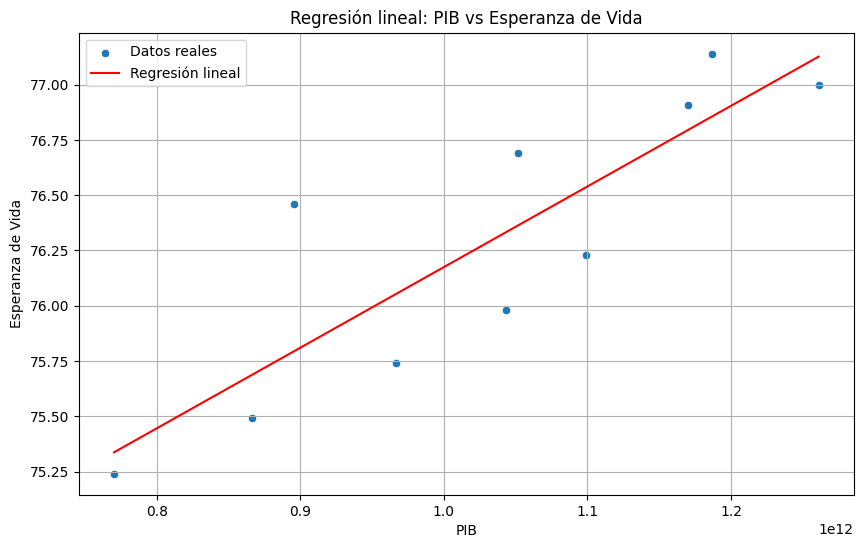

In [10]:
# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PIB', y='EV', data=df, label='Datos reales')
sns.lineplot(x='PIB', y='EV_predicha', data=df, color='red', label='Regresión lineal')
plt.title('Regresión lineal: PIB vs Esperanza de Vida')
plt.xlabel('PIB')
plt.ylabel('Esperanza de Vida')
plt.legend()
plt.grid(True)

### Interpretación de la regresión lineal: PIB vs Esperanza de Vida

La gráfica anterior muestra la relación entre el Producto Interno Bruto (PIB) y la Esperanza de Vida (EV) en un país durante el periodo 2004–2013.

- Los **puntos azules** representan los datos reales observados de esperanza de vida para cada valor del PIB.
- La **línea roja** corresponde al modelo de **regresión lineal ajustado**, que estima cómo cambia la esperanza de vida en función del PIB.

#### Análisis:

- Se observa una **tendencia positiva**: a medida que aumenta el PIB, también tiende a aumentar la esperanza de vida.
- Esto sugiere que un mayor nivel de desarrollo económico puede estar asociado con mejores condiciones de salud, infraestructura y bienestar general en la población.
- La **dispersión moderada** de los puntos alrededor de la línea indica que, aunque existe una relación lineal clara, también hay otros factores que influyen en la esperanza de vida.

#### Conclusión:

El modelo es útil para entender la correlación entre economía y salud en términos generales, aunque no debe considerarse una relación causal directa. Para un análisis más completo, sería recomendable considerar otras variables como gasto en salud, educación, acceso a servicios, etc.


In [11]:
import statsmodels.api as sm

# Variable independiente con constante (intercepto)
X = sm.add_constant(df['PIB'])  # Esto agrega la columna beta0 automáticamente
y = df['EV']  # Variable dependiente

# Especificar y ajustar el modelo
modelo = sm.OLS(y, X)
resultado = modelo.fit()

# Resultados
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                     EV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     22.72
Date:                Thu, 24 Apr 2025   Prob (F-statistic):            0.00141
Time:                        00:54:41   Log-Likelihood:                -2.8108
No. Observations:                  10   AIC:                             9.622
Df Residuals:                       8   BIC:                             10.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5269      0.797     90.980      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


### Interpretación del resumen de regresión OLS (PIB vs Esperanza de Vida)

Este resumen estadístico corresponde a un modelo de regresión lineal simple donde la **variable dependiente** es la *Esperanza de Vida (EV)* y la **variable independiente** es el *PIB*.

---

#### Principales resultados:

| Métrica                         | Valor              | Interpretación |
|-------------------------------|--------------------|----------------|
| **R² (R-squared)**             | 0.740              | El 74% de la variabilidad en la esperanza de vida puede explicarse por el PIB. Es un ajuste razonable para un modelo con una sola variable. |
| **R² ajustado**                | 0.707              | Corrige R² teniendo en cuenta el número de predictores. Es muy similar, lo que indica que el modelo no está sobreajustado. |
| **F-statistic**                | 22.72              | Mide la significancia global del modelo. Un valor alto indica que el modelo como un todo es estadísticamente significativo. |
| **Prob (F-statistic)**        | 0.00141            | El modelo es altamente significativo (p < 0.05), lo que valida la relación entre el PIB y EV. |
| **Intercepto (const)**        | 72.5269            | Si el PIB fuera 0, la esperanza de vida esperada sería de ~72.5 años (valor teórico). |
| **Coef. PIB**                 | 3.648 × 10⁻¹²      | Por cada unidad adicional en el PIB, la esperanza de vida aumenta mínimamente. La escala del PIB es tan grande que este coeficiente, aunque pequeño, es relevante. |
| **p-valor del PIB**           | 0.001              | El PIB es un predictor **estadísticamente significativo** de la esperanza de vida. |
| **Durbin-Watson**             | 1.299              | Indica posible autocorrelación positiva de los residuos (idealmente ~2). No es crítica, pero sugiere examinar más a fondo. |
| **Omnibus / JB / Kurtosis**   | No significativos  | Los residuos parecen seguir una distribución normal, ya que los p-valores son altos (> 0.05). |

---

#### Conclusión:

- El modelo sugiere una **relación positiva y significativa** entre el PIB y la esperanza de vida.
- Aunque el coeficiente del PIB parece pequeño, esto es natural debido a la magnitud del PIB (billones).
- El modelo tiene buen ajuste general, aunque se recomienda ampliar el análisis con más variables explicativas (educación, salud pública, nutrición, etc.).
- Los residuos se comportan de forma aceptable y no muestran signos graves de violación de supuestos.

0   -0.096773
1   -0.197267
2   -0.313486
3   -0.353136
4   -0.306249
5    0.667063
6    0.326830
7    0.114699
8    0.284962
9   -0.126644
dtype: float64


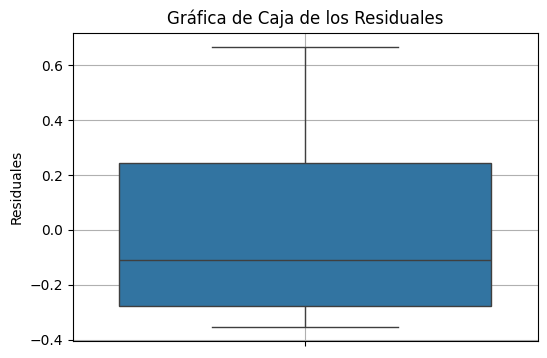

In [12]:
import seaborn as sns

# Obtener los residuales del modelo ajustado
residuales = resultado.resid
print(residuales)

# Crear la gráfica de caja
plt.figure(figsize=(6, 4))
sns.boxplot(y=residuales)
plt.title('Gráfica de Caja de los Residuales')
plt.ylabel('Residuales')
plt.grid(True)
plt.show()